In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df= pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avarage_salary,company_text,job_states,same_state,age,python_req,r_req,spark_req,excel_req
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,KnowBe4\n,FL,1,12,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,PNNL\n,WA,1,57,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,1


In [5]:
print(df.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age',
       'python_req', 'r_req', 'spark_req', 'excel_req'],
      dtype='object')


In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [9]:
df["job_simplified"]= df["Job Title"].apply(title_simplifier)
df["job_simplified"].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplified, dtype: int64

In [10]:
df["seniority"]= df["Job Title"].apply(seniority)
df["seniority"].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [15]:
df['job_states']= df["job_states"].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df["job_states"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_states, dtype: int64

In [16]:
df["job_des_len"]= df["Job Description"].apply(lambda x: len(x))
df["job_des_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: job_des_len, Length: 742, dtype: int64

In [24]:
df["no_of_competitiors"]= df["Competitors"].apply(lambda x: len(x.split(",")) if x!= '-1' else 0)
df["no_of_competitiors"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: no_of_competitiors, Length: 742, dtype: int64

In [25]:
df['hourly']

0      0
1      0
2      0
3      0
4      0
      ..
737    0
738    0
739    0
740    0
741    0
Name: hourly, Length: 742, dtype: int64

In [31]:
df["min_salary"]= df.apply(lambda x: x["min_salary"]*2 if x["hourly"]== 1 else x["min_salary"], axis=1)

In [32]:
df["max_salary"]= df.apply(lambda x: x["max_salary"]*2 if x["hourly"]== 1 else x["max_salary"], axis=1)

In [34]:
df.loc[df["hourly"]==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [36]:
df["company_text"]= df["company_text"].apply(lambda x: x.replace("\n", ""))

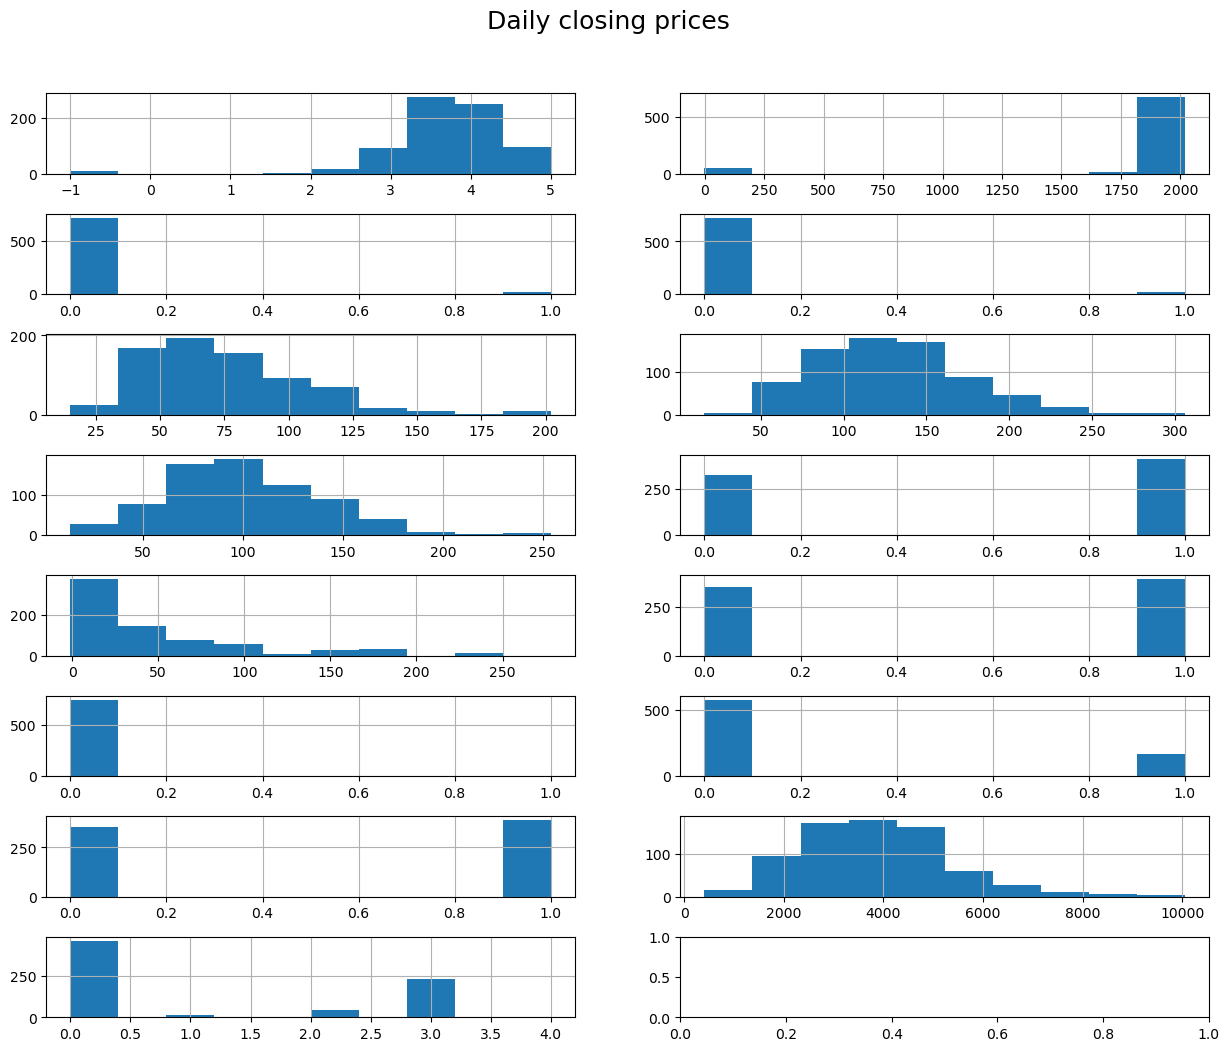

In [66]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)
n=1

for col in df.columns:
    if(df[col].dtype== 'object'):
        continue

    ax = plt.subplot(8, 2, n)
    # print(col, '->',df[col].dtype)
    # plt.figure()
    df[col].hist(ax=ax)
    n=n+1
    # plt.show()

In [45]:
df['company_text'].dtype

dtype('O')